# Import libraries

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [4]:
df=pd.read_csv("D:\\machinelearning_projects\\Data Sets\\BIKE DETAILS.csv")

In [5]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1056    False
1057    False
1058    False
1059    False
1060    False
Length: 1061, dtype: bool

In [7]:
df.drop_duplicates()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


<AxesSubplot:>

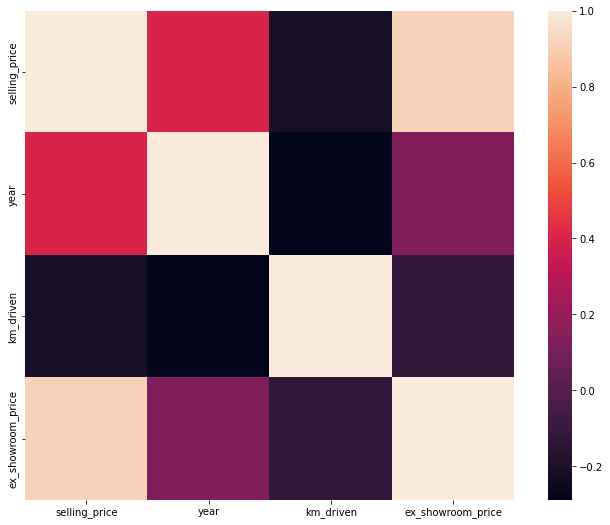

In [12]:
corrl=df.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrl,vmax=1,square=True)

In [13]:
df=df.drop(['name','seller_type','owner'],axis=1)

In [14]:
df

,selling_price,year,km_driven,ex_showroom_price
0,175000,2019,350,NaN
1,45000,2017,5650,NaN
2,150000,2018,12000,148114.0
3,65000,2015,23000,89643.0
4,20000,2011,21000,NaN
...,...,...,...,...
1056,17000,2010,500000,52000.0
1057,16000,2012,33000,51000.0
1058,15000,2013,35000,57000.0
1059,12000,2009,53000,58000.0


In [15]:
df.isnull().sum()

selling_price          0
year                   0
km_driven              0
ex_showroom_price    435
dtype: int64

In [16]:
df.dtypes

selling_price          int64
year                   int64
km_driven              int64
ex_showroom_price    float64
dtype: object

In [17]:
df.columns

Index(['selling_price', 'year', 'km_driven', 'ex_showroom_price'], dtype='object')

In [18]:
cleanning=SimpleImputer(missing_values=np.nan,strategy='mean')
df=cleanning.fit_transform(df)

In [19]:
df

array([[175000.        ,   2019.        ,    350.        ,
         87958.71405751],
       [ 45000.        ,   2017.        ,   5650.        ,
         87958.71405751],
       [150000.        ,   2018.        ,  12000.        ,
        148114.        ],
       ...,
       [ 15000.        ,   2013.        ,  35000.        ,
         57000.        ],
       [ 12000.        ,   2009.        ,  53000.        ,
         58000.        ],
       [ 10000.        ,   2008.        ,  92233.        ,
         75000.        ]])

In [20]:
x=df[:,:-1]
y=df[:,-1]

In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc_X = MinMaxScaler()
x =  sc_X.fit_transform(x)

In [28]:
x

array([[0.22516556, 0.96875   , 0.        ],
       [0.05298013, 0.90625   , 0.00602512],
       [0.19205298, 0.9375    , 0.0132439 ],
       ...,
       [0.01324503, 0.78125   , 0.03939067],
       [0.00927152, 0.65625   , 0.05985335],
       [0.00662252, 0.625     , 0.10445404]])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33)

In [31]:
x_train.shape

(710, 3)

In [32]:
x_test.shape

(351, 3)

In [33]:
y_train.shape

(710,)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
LR=LinearRegression(fit_intercept=True,copy_X=True,n_jobs=2)

In [36]:
LR.fit(x_train,y_train)

LinearRegression(n_jobs=2)

In [37]:
LR.score(x_train,y_train)

0.6019558598658473

In [38]:
LR.score(x_test,y_test)

0.6025935443581822

In [39]:
y_pred=LR.predict(x_test)

In [40]:
y_pred[:5]

array([ 88217.20452868,  62797.74250962,  87967.54996465,  65633.46332402,
       159767.25063944])

In [41]:
y_train[:5]

array([64000.        , 72532.        , 63537.        , 87958.71405751,
       59422.        ])

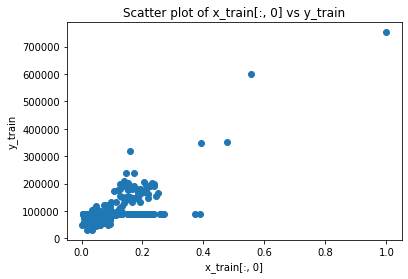

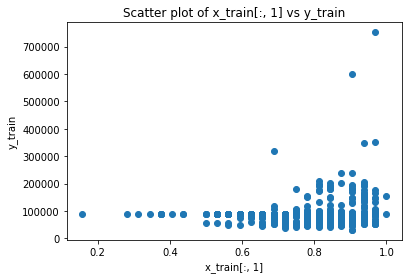

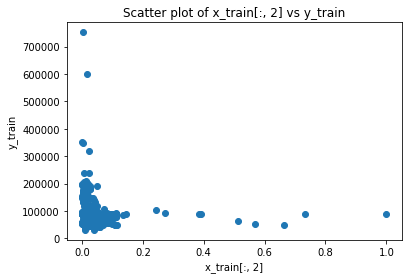

In [43]:
for i in range(x_train.shape[1]):
    plt.figure()
    plt.scatter(x_train[:, i], y_train)
    plt.xlabel(f'x_train[:, {i}]')
    plt.ylabel('y_train')
    plt.title(f'Scatter plot of x_train[:, {i}] vs y_train')
    plt.show()

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error

In [50]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mee=median_absolute_error(y_test,y_pred)

In [51]:
print(mse)
print(mae)
print(mee)

2558447485.780628
20975.223782535373
13069.536443858262
